In [75]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import numpy as np

In [76]:
imgs_path = "../img"
with open("./bfs_adj_list.json", "r") as graph_file:
    graph_data = graph_file.read()
graph_dict = json.loads(graph_data)

In [77]:
graph = nx.DiGraph(graph_dict)

In [78]:
print("Number of nodes", graph.number_of_nodes())
print("Number of edges", graph.number_of_edges())

Number of nodes 2592
Number of edges 112137


In [79]:
print("Density", nx.density(graph))

Density 0.01669731049073002


Degree distribution


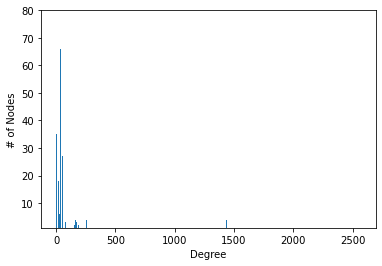

In [80]:
print("Degree distribution")
graph_degree_sequence = sorted([d for n,d in graph.degree()], reverse=True)
graph_degree_distribution_fig, graph_degree_distribution_ax = plt.subplots()
graph_degree_distribution = graph_degree_distribution_ax.bar(*np.unique(graph_degree_sequence, return_counts=True))
graph_degree_distribution_ax.set_xlabel("Degree")
graph_degree_distribution_ax.set_ylabel("# of Nodes")
plt.ylim(1,80)
plt.savefig(f"{imgs_path}/otu_degree_distribution.png")

Degree distribution (log-log)


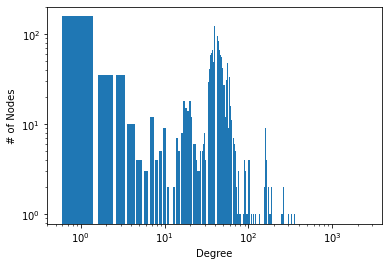

In [81]:
print("Degree distribution (log-log)")
graph_degree_sequence = sorted([d for n,d in graph.degree()], reverse=True)
graph_degree_distribution_fig, graph_degree_distribution_ax = plt.subplots()
graph_degree_distribution = graph_degree_distribution_ax.bar(*np.unique(graph_degree_sequence, return_counts=True))
graph_degree_distribution_ax.set_xlabel("Degree")
graph_degree_distribution_ax.set_ylabel("# of Nodes")
plt.xscale("log")
plt.yscale("log")
plt.savefig(f"{imgs_path}/otu_log_log_degree_distribution.png")

In [82]:
graph_avg_clust_coef = nx.average_clustering(graph)
print("Average clustering coefficient", graph_avg_clust_coef)

Average clustering coefficient 0.49300588667153894


In [83]:
graph_comps = nx.strongly_connected_components(graph)
print("Number of nodes in SCC", max([len(c) for c in sorted(graph_comps, key=len, reverse=True)]))

graph_comps = list(sorted(nx.strongly_connected_components(graph), key=len, reverse=True)[0])
graph_scc_subgraph = graph.subgraph(graph_comps)

print("Average shortest path length", nx.average_shortest_path_length(graph_scc_subgraph))

print("Diameter", nx.diameter(graph_scc_subgraph))

Number of nodes in SCC 2343
Average shortest path length 4.737345794092766
Diameter 63


In [84]:
graph_wcc = nx.weakly_connected_components(graph)
nodes_wcc = max([len(c) for c in sorted(graph_wcc, key=len, reverse=True)])

graph_wcc_comps = list(sorted(nx.weakly_connected_components(graph), key=len, reverse=True)[0])
graph_wcc_subgraph = graph.subgraph(graph_wcc_comps)

print("Nodes in WCC", nodes_wcc)

print("Average shortest path length", nx.average_shortest_path_length(graph_wcc_subgraph))

print("Diameter", nx.diameter(graph_wcc_subgraph.to_undirected()))

Nodes in WCC 2592
Average shortest path length 4.261218051803251
Diameter 7


In [85]:
nx.is_weakly_connected(graph)

True

In [86]:
import matplotlib.cm as cm
from networkx.algorithms.community import girvan_newman

In [87]:
graph_comms = girvan_newman(graph)
graph_comms_groups = []
for graph_comm in next(graph_comms):
    graph_comms_groups.append(graph_comm)

# graph_colors = cm.rainbow(np.linspace(0, 1, len(graph_comms_groups)))
# graph_comms_color_map = []
# for graph_node in graph:
#     for graph_group in graph_comms_groups:
#         if graph_node in graph_group:
#             graph_group_idx = graph_comms_groups.index(graph_group)
#             graph_comms_color_map.append(graph_colors[graph_group_idx])

# nx.draw_networkx(graph, node_color=graph_comms_color_map, with_labels=True)
# plt.savefig(f'{imgs_path}/otu_communities.png')

In [88]:
print(len(graph_comms_groups[0]))
print(len(graph_comms_groups[1]))

2589
3


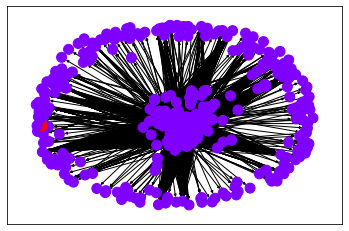

In [89]:
graph_colors = cm.rainbow(np.linspace(0, 1, len(graph_comms_groups)))
graph_comms_color_map = []
for graph_node in graph:
    for graph_group in graph_comms_groups:
        if graph_node in graph_group:
            graph_group_idx = graph_comms_groups.index(graph_group)
            graph_comms_color_map.append(graph_colors[graph_group_idx])

nx.draw_networkx(graph, node_color=graph_comms_color_map, with_labels=False, node_size=100, arrowsize=5)
plt.savefig(f'{imgs_path}/otu_communities.png')

In [90]:
community_1_graph = graph.subgraph(graph_comms_groups[0])
community_2_graph = graph.subgraph(graph_comms_groups[1])

In [91]:
print("Community 1, max in degree",sorted([(d, n) for d,n in community_1_graph.in_degree()], key=lambda x: x[1], reverse=True)[0])
print("Community 1, max out degree",sorted([(d, n) for d,n in community_1_graph.out_degree()], key=lambda x: x[1], reverse=True)[0])

print("Community 2, max in degree",sorted([(d, n) for d,n in community_2_graph.in_degree()], key=lambda x: x[1], reverse=True)[0])
print("Community 2, max out degree",sorted([(d, n) for d,n in community_2_graph.out_degree()], key=lambda x: x[1], reverse=True)[0])

Community 1, max in degree ('https://ontariotechu.ca', 2310)
Community 1, max out degree ('https://ontariotechu.ca', 257)
Community 2, max in degree ('https://fr.mindsight.ontariotechu.ca', 2)
Community 2, max out degree ('https://mindsight.ontariotechu.ca', 1)


In [92]:
from networkx.algorithms.centrality import degree_centrality, in_degree_centrality, out_degree_centrality, betweenness_centrality, closeness_centrality

In [93]:
'''Degree Centrality'''
graph_degree_centrality = degree_centrality(graph)
graph_degree_centrality = dict(sorted(graph_degree_centrality.items(), key=lambda item: item[1], reverse=True))

graph_in_degree_centrality = in_degree_centrality(graph)
graph_in_degree_centrality = dict(sorted(graph_in_degree_centrality.items(), key=lambda item: item[1], reverse=True))

graph_out_degree_centrality = out_degree_centrality(graph)
graph_out_degree_centrality = dict(sorted(graph_out_degree_centrality.items(), key=lambda item: item[1], reverse=True))

graph_degree_items = list(graph_degree_centrality.items())[:10]
graph_in_degree_items = list(graph_in_degree_centrality.items())[:10]
graph_out_degree_items = list(graph_out_degree_centrality.items())[:10]

In [99]:
print("Network degree")
for idx in range(len(graph_degree_items)):
    print(f'{idx+1} & {graph_degree_items[idx][0]} & {format(graph_degree_items[idx][1], ".3f")} \\\ \hline')

Network degree
1 & https://ontariotechu.ca & 0.991 \\ \hline
2 & https://ontariotechu.ca/future-students/undergraduate/campus-tours-and-events & 0.914 \\ \hline
3 & https://ontariotechu.ca/faculty_staff & 0.912 \\ \hline
4 & https://ontariotechu.ca/virtualtour & 0.911 \\ \hline
5 & https://ontariotechu.ca/contact-us.php & 0.911 \\ \hline
6 & https://ontariotechu.ca/terms-of-use.php & 0.910 \\ \hline
7 & https://ontariotechu.ca/about & 0.910 \\ \hline
8 & https://ontariotechu.ca/about/campus-buildings & 0.910 \\ \hline
9 & https://usgc.ontariotechu.ca/governance & 0.832 \\ \hline
10 & https://hr.ontariotechu.ca/working_at_uoit/careers & 0.832 \\ \hline


In [100]:
print("Network in degree")
for idx in range(len(graph_in_degree_items)):
    print(f'{idx+1} & {graph_in_degree_items[idx][0]} & {format(graph_in_degree_items[idx][1], ".3f")} \\\ \hline')

Network in degree
1 & https://ontariotechu.ca & 0.892 \\ \hline
2 & https://ontariotechu.ca/forms/online/view.php & 0.819 \\ \hline
3 & https://news.ontariotechu.ca/media-inquiries & 0.816 \\ \hline
4 & https://ontariotechu.ca/maps & 0.816 \\ \hline
5 & https://ontariotechu.ca/about & 0.816 \\ \hline
6 & https://ontariotechu.ca/future-students/undergraduate/campus-tours-and-events & 0.816 \\ \hline
7 & https://ontariotechu.ca/virtualtour & 0.816 \\ \hline
8 & https://usgc.ontariotechu.ca/governance & 0.816 \\ \hline
9 & https://hr.ontariotechu.ca/working_at_uoit/careers & 0.816 \\ \hline
10 & https://ontariotechu.ca/terms-of-use.php & 0.816 \\ \hline


In [101]:
print("Network out degree")
for idx in range(len(graph_out_degree_items)):
    print(f'{idx+1} & {graph_out_degree_items[idx][0]} & {format(graph_out_degree_items[idx][1], ".3f")} \\\ \hline')

Network out degree
1 & https://ontariotechu.ca & 0.099 \\ \hline
2 & https://ontariotechu.ca/faculty_staff & 0.098 \\ \hline
3 & https://ontariotechu.ca/future-students/undergraduate/campus-tours-and-events & 0.097 \\ \hline
4 & https://ontariotechu.ca/connectwithus & 0.097 \\ \hline
5 & https://blog.ontariotechu.ca/all & 0.096 \\ \hline
6 & https://ontariotechu.ca/mycampus & 0.096 \\ \hline
7 & https://ontariotechu.ca/about/campus-buildings/downtown-oshawa & 0.096 \\ \hline
8 & https://ontariotechu.ca/apply & 0.095 \\ \hline
9 & https://ontariotechu.ca/future-students/viewbooks.php & 0.095 \\ \hline
10 & https://ontariotechu.ca/current-students/academic-calendars/academic-calendar-archive.php & 0.095 \\ \hline


In [103]:
'''Closeness'''
graph_closeness_centrality = closeness_centrality(graph)
graph_closeness_centrality = dict(sorted(graph_closeness_centrality.items(), key=lambda item: item[1], reverse=True))

graph_closeness_items = list(graph_closeness_centrality.items())[:10]

for idx in range(len(graph_closeness_items)):
    print(f'{idx+1} & {graph_closeness_items[idx][0]} & {format(graph_closeness_items[idx][1], ".3f")} \\\ \hline')

1 & https://ontariotechu.ca & 0.891 \\ \hline
2 & https://ontariotechu.ca/forms/online/view.php & 0.827 \\ \hline
3 & https://ontariotechu.ca/maps & 0.824 \\ \hline
4 & https://news.ontariotechu.ca/media-inquiries & 0.824 \\ \hline
5 & https://ontariotechu.ca/about & 0.824 \\ \hline
6 & https://ontariotechu.ca/future-students/undergraduate/campus-tours-and-events & 0.824 \\ \hline
7 & https://ontariotechu.ca/virtualtour & 0.824 \\ \hline
8 & https://usgc.ontariotechu.ca/governance & 0.824 \\ \hline
9 & https://hr.ontariotechu.ca/working_at_uoit/careers & 0.824 \\ \hline
10 & https://ontariotechu.ca/terms-of-use.php & 0.824 \\ \hline


In [104]:
'''Betweenness'''
graph_betweenness_centrality = betweenness_centrality(graph)
graph_betweenness_centrality = dict(sorted(graph_betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

graph_betweenness_items = list(graph_betweenness_centrality.items())[:10]

for idx in range(len(graph_betweenness_items)):
    print(f'{idx+1} & {graph_betweenness_items[idx][0]} & {format(graph_betweenness_items[idx][1], ".3f")} \\\ \hline')

1 & https://blog.ontariotechu.ca & 0.284 \\ \hline
2 & https://blog.ontariotechu.ca/all & 0.214 \\ \hline
3 & https://ontariotechu.ca & 0.107 \\ \hline
4 & https://ontariotechu.ca/sites/library & 0.066 \\ \hline
5 & https://news.ontariotechu.ca/archives/2021/12/in-retrospect-ontario-tech-university-in-2021.php & 0.057 \\ \hline
6 & https://ontariotechu.ca/future-students/undergraduate/campus-tours-and-events & 0.043 \\ \hline
7 & https://ontariotechu.ca/faculty_staff & 0.041 \\ \hline
8 & https://ontariotechu.ca/contact-us.php & 0.035 \\ \hline
9 & https://socialscienceandhumanities.ontariotechu.ca & 0.035 \\ \hline
10 & https://ontariotechu.ca/virtualtour & 0.035 \\ \hline


In [106]:
'''Page Rank'''
graph_page_rank_centrality = nx.pagerank(graph)
graph_page_rank_centrality = dict(sorted(graph_page_rank_centrality.items(), key=lambda item: item[1], reverse=True))

graph_page_rank_items = list(graph_page_rank_centrality.items())[:10]

for idx in range(len(graph_page_rank_items)):
    print(f'{idx+1} & {graph_page_rank_items[idx][0]} & {format(graph_page_rank_items[idx][1], ".3f")} \\\ \hline')

1 & https://ontariotechu.ca & 0.022 \\ \hline
2 & https://ontariotechu.ca/sites/library & 0.017 \\ \hline
3 & https://ontariotechu.ca/forms/online/view.php & 0.014 \\ \hline
4 & https://news.ontariotechu.ca/media-inquiries & 0.014 \\ \hline
5 & https://ontariotechu.ca/maps & 0.014 \\ \hline
6 & https://ontariotechu.ca/about & 0.014 \\ \hline
7 & https://ontariotechu.ca/future-students/undergraduate/campus-tours-and-events & 0.014 \\ \hline
8 & https://ontariotechu.ca/virtualtour & 0.014 \\ \hline
9 & https://usgc.ontariotechu.ca/governance & 0.014 \\ \hline
10 & https://hr.ontariotechu.ca/working_at_uoit/careers & 0.014 \\ \hline
